<a href="https://colab.research.google.com/github/drdww/OPIM5641/blob/main/Module1/M1_3/CellPhones_CC_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Simulation: Cell Phones
**OPIM 5641: Business Decision Modeling - University of Connecticut**

Monte Carlo is a useful method for simulation... why be so confident in your mathematical model of the World when you can add some uncertainty?!

Please refer to Powell Chapter 14 for more details/examples.

------------------------------------------------------

**[Profit Analysis 14.1 - Powell]** A consumer electronics firm produces a line
of battery rechargers for cell phones. The following distributions apply:

* Unit price triangular with a minimum of 18.95 USD, most
likely value of 24.95 USD, and maximum of 26.95 USD
* Unit cost uniform with a minimum of 12.00 USD and a
maximum of 15.00
* Quantity sold = $10,000 – 250*UnitPrice$, plus a random term
given by a normal distribution with a mean of
0 and a standard deviation of 10
* Fixed costs normal with a mean of 30,000 USD and a standard deviation of 5,000 USD

1. What is the expected profit?
2. What is the probability of a loss?
3. What is the maximum loss?

Let's start with a very basic set-up of the problem so we have some reasonable numbers to work with. Why not just choose values from the center of the distribution?

In [ ]:
# problem set up
UnitPrice = 24.95
UnitCost = 13.50
QuantitySold = 10000 - 250*UnitPrice
FixedCosts = 30000
Profit = QuantitySold*(UnitPrice - UnitCost) - FixedCosts
Profit


13080.625

This is a pretty simple problem to solve - why not introduce some uncertainty (in the form of probability distributions)? We will break this out one by one.

## Unit Price (Triangle Distribution)
Read more on the triangular distribution from here: https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html

Unit price triangular with a minimum of 18.95 USD, most likely value of 24.95 USD, and maximum of 26.95 USD

In [ ]:
# import modules
import numpy as np
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting
from pylab import * # for plotting

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Let's make a pretty plot of the triangular distribution. 

In [ ]:
# generate 100K random numbers from the distribution!
tmp = np.random.triangular(left=18.95, mode=24.95, right=26.95, size=100000)
tmp

array([21.34347241, 24.58881049, 21.27986412, ..., 23.64520567,
       25.91676236, 25.70720275])

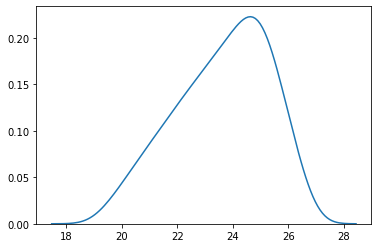

In [ ]:
# make a density plot
sns.kdeplot(np.array(tmp), bw=0.5) # see how it is shaped like a triangle?
plt.show()

In [ ]:
# import the triangular distribution
UnitPrice = np.random.triangular(left=18.95, mode=24.95, right=26.95)
UnitPrice # if you run this cell repeatedly, you'll get a random number every time!

22.824202931629785

We will call all of these in a for loop at the very end.

## Unit Cost (Uniform Distribution)

Read more here: https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

Unit cost uniform with a minimum of 12.00 USD and a maximum of 15.00

In [ ]:
# generate 100K random numbers from the distribution!
tmp = np.random.uniform(low=12, high=15, size=100000)
tmp

array([13.29484422, 12.2847795 , 13.70761341, ..., 12.9535844 ,
       14.89242303, 13.95444019])

(array([ 9856., 10001., 10056., 10008.,  9971., 10163., 10019., 10027.,
         9982.,  9917.]),
 array([12.00000889, 12.30000065, 12.59999241, 12.89998418, 13.19997594,
        13.4999677 , 13.79995946, 14.09995122, 14.39994298, 14.69993474,
        14.9999265 ]),
 <a list of 10 Patch objects>)

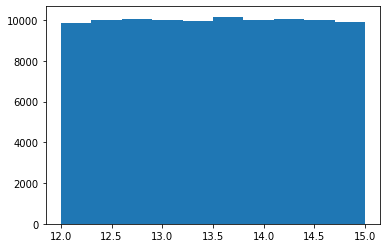

In [ ]:
# make a histogram
hist(tmp) # see how it is shaped like a rectangle?

In [ ]:
UnitCost = np.random.uniform(low=12, high=15)
UnitCost # new value every time, try running a few times

13.295962360397741

## Quantity Sold (Normal Distribution)
Read more here: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

Quantity sold =  10,000–250∗UnitPrice , plus a random term given by a normal distribution with a mean of 0 and a standard deviation of 10

In [ ]:
# generate 100K random numbers from the distribution!
tmp = np.random.normal(loc=0, scale=10, size=100000)
tmp

array([-9.57963578,  3.63624152,  0.09333751, ...,  5.00570077,
        2.06051126, -6.85626921])

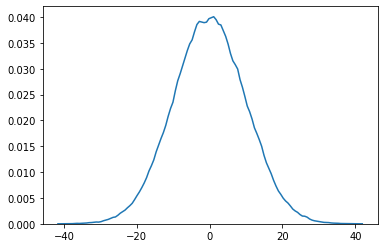

In [ ]:
# here's what that random term looks like
# make a density plot
sns.kdeplot(tmp, bw=0.5) # see how it is shaped like a bell?
plt.show()

In [ ]:
# let's store this for later
QuantitySold = 10000 - 250*UnitPrice + np.random.normal(loc=0, scale=10)
QuantitySold # check your work, run a few times

# remember, I only need one random value here...
# don't pass the giant size term!

4299.611799188699

## Fixed Costs (Normal Distribution)
Read more here: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

Fixed costs normal with a mean of 30,000 USD and a standard deviation of 5,000 USD

In [ ]:
# similar to above, so we get right to it
tmp = np.random.normal(loc=30000, scale=5000, size=100000)
tmp

array([32729.71064136, 29176.59748498, 18823.98951722, ...,
       30802.70379931, 31718.2615737 , 32799.89479873])

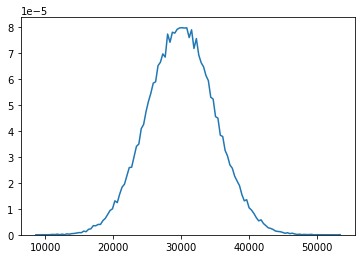

In [ ]:
# make a density plot
sns.kdeplot(tmp, bw=0.5) # see how it is shaped like a bell?
plt.show() # see how it is centered around 30K?

In [ ]:
# now let's store it for later
FixedCosts = np.random.normal(loc=30000, scale=5000)
FixedCosts # check your work, run a few times

27429.743141185827

# 1. Answer: Expected Profit
We are ready to build our for loop! 

You already saw the simple example above, but now I've renamed all the variables. I'll put them all down here so your code runs nicely.

In [ ]:
# here's everything above, except with probability distributions
UnitPrice = np.random.triangular(left=18.95, mode=24.95, right=26.95)
print("UnitPrice:", UnitPrice) # if you run this cell repeatedly, you'll get a random number every time!
UnitCost = np.random.uniform(low=12, high=15)
print("UnitCost:",UnitCost) # new value every time, try running a few times
QuantitySold = 10000 - 250*UnitPrice + np.random.normal(loc=0, scale=10)
print('QuantitySold:', QuantitySold) # check your work, run a few times
FixedCosts = np.random.normal(loc=30000, scale=5000)
print('FixedCosts:', FixedCosts) # check your work, run a few times
Profit = QuantitySold*(UnitPrice - UnitCost) - FixedCosts
print('Profit:', Profit)

# run these a few times - see how the output changes?

UnitPrice: 23.811478098925363
UnitCost: 14.047343963855838
QuantitySold: 4036.0008724883933
FixedCosts: 30473.767836992247
Profit: 8934.286051242063


Now the fun part - stick it all in a for loop - we will repeat 10K times then evaluate the output.

In [ ]:
# an empty list to store results
results = []

for a in np.arange(0,10000,1):
  UnitPrice = np.random.triangular(left=18.95, mode=24.95, right=26.95)
  # print("UnitPrice:", UnitPrice) # if you run this cell repeatedly, you'll get a random number every time!
  UnitCost = np.random.uniform(low=12, high=15)
  # print("UnitCost:",UnitCost) # new value every time, try running a few times
  QuantitySold = 10000 - 250*UnitPrice + np.random.normal(loc=0, scale=10)
  # print('QuantitySold:', QuantitySold) # check your work, run a few times
  FixedCosts = np.random.normal(loc=30000, scale=5000)
  # print('FixedCosts:', FixedCosts) # check your work, run a few times
  Profit = QuantitySold*(UnitPrice - UnitCost) - FixedCosts
  # print('Profit:', Profit)
  results = np.append(results, Profit)
  # print('Results:', results)

# out of the loop - no tab here!
print('IM DONE!')

IM DONE!


In [ ]:
# check what you did - lots of values...
print(results.shape) # 10K entries just like we asked
results

(10000,)


array([ 2600.15137195, -1780.6556852 , 14124.27630227, ...,
       19441.07402887,  1780.22250896,  5750.42858043])

In [ ]:
# what's the mean of the distribution?
np.mean(results)

10710.894277794352

In [ ]:
# min and max?
print(np.min(results)) # yikes - in some cases, you'll lose money!
print(np.max(results)) # other times you'll make gobs of money!

-15843.016370767498
33806.49015417737


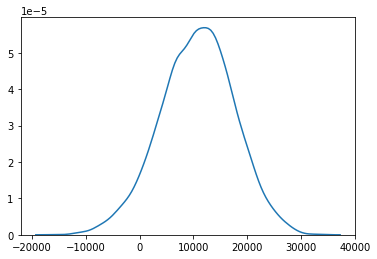

In [ ]:
# here is the distribution of values
sns.kdeplot(results)
plt.show()

Let's add a nice red line where the mean is.

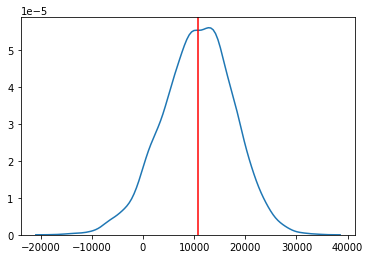

In [ ]:
# same plot, but with a red line
sns.kdeplot(results)
plt.axvline(np.mean(results), color='red')
plt.show()

# 2. Answer: Probability of a Loss
For this one, we need to see how many of our results are less than 0.

In [ ]:
# what's the size of our results? 10K
results.shape

(10000,)

In [ ]:
# how many are less than zero?
lessThanZero = np.where(results <0)
lessThanZero = np.array(lessThanZero) # make sure it stored as an array!
lessThanZero.shape 

(1, 643)

In [ ]:
# so, it's less than zero divided by total (10K)
print(results.shape)
lessThanZero.shape[1]/results.shape[0]

# 0.064 means a 6.4% chance (don't forget to multiply by 100)
# your results may be slightly different due to randomness

(10000,)


0.0643

# 3. Answer: Maximum Loss
This one is easy - just the min!

In [ ]:
np.min(results) # booyah!

-17493.25366967071

# On Your Own
Can you find what the median is? The 30th percentile (30% chance profits will be below this level)? The 90th percentile (90% chance profits will be below this level, 10% chance they will be higher?)